In [1]:
from numba import cuda
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from PIL import Image


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
im = plt.imread("/content/drive/MyDrive/Colab Notebooks/image.jpg")

In [4]:
shape = np.shape(im)
shape

(1080, 1920, 3)

In [5]:
devdata = cuda.to_device(im)
devOuput = cuda.device_array(shape, np.uint8)

In [6]:

@cuda.jit
def grayscale(src, dst):
  tidx = cuda.threadIdx.x + cuda.blockIdx.x * cuda.blockDim.x
  tidy = cuda.threadIdx.y + cuda.blockIdx.y * cuda.blockDim.y

  g = np.uint8((src[tidx, tidy, 0] + src[tidx, tidy, 1] + src[tidx, tidy, 2]) / 3)
  dst[tidx, tidy, 0] = dst[tidx, tidy, 1] = dst[tidx, tidy, 2] = g

In [7]:
def testfunc(x):
  t1 = time.time()
  blockSize = (x, x)
  gridSize = (math.ceil(shape[0]/blockSize[0]),math.ceil(shape[1]/blockSize[1]))
  grayscale[gridSize, blockSize](devdata, devOuput)
  t2 = time.time()
  t = t2 - t1

  return t


In [8]:
x =  list(range(1, 33))
result = []

for i in x:
  t3 = testfunc(i)
  result.append(t3)



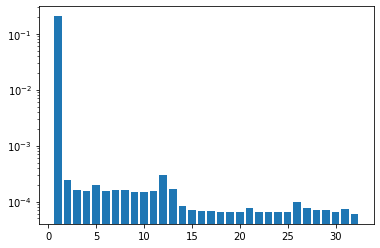

In [9]:
plt.bar(x, result)
plt.yscale("log")

In [10]:
result

[0.20613360404968262,
 0.00024390220642089844,
 0.0001633167266845703,
 0.0001518726348876953,
 0.00019598007202148438,
 0.00015735626220703125,
 0.00016045570373535156,
 0.0001633167266845703,
 0.00014901161193847656,
 0.0001461505889892578,
 0.00015687942504882812,
 0.0003006458282470703,
 0.0001685619354248047,
 8.296966552734375e-05,
 7.128715515136719e-05,
 6.866455078125e-05,
 6.723403930664062e-05,
 6.508827209472656e-05,
 6.461143493652344e-05,
 6.556510925292969e-05,
 7.724761962890625e-05,
 6.651878356933594e-05,
 6.413459777832031e-05,
 6.461143493652344e-05,
 6.4849853515625e-05,
 9.965896606445312e-05,
 7.653236389160156e-05,
 7.224082946777344e-05,
 6.961822509765625e-05,
 6.508827209472656e-05,
 7.367134094238281e-05,
 6.031990051269531e-05]

In [11]:
#imgray = devOuput.copy_to_host()
#imgpu = Image.fromarray(imgray)
#imgpu.save("/content/drive/MyDrive/Colab Notebooks/image_gray_GPU_2.jpeg")